In [16]:
import requests
from bs4 import BeautifulSoup
import re

res = requests.get('http://news.sina.com.cn/china/')
res.encoding = 'utf-8'

In [19]:
soup = BeautifulSoup(res.text, 'html.parser')
newsary = []
for link in soup.select('.feed-card-item'):
    print(link)
    if len(link.select('h2 a')) > 0:
        newsary.append(getArticle(link.select('h2 a')[0]['href']))

In [8]:
def getArticle(url):
    res = requests.get(url)
    res.encoding = 'utf-8'
    
    soup = BeautifulSoup(res.text, 'html.parser')
    dic = {}
    
    dic['title'] = soup.select('.main-title')[0].text
    dic['content'] = ' '.join(soup.select('.article')[0].text.split())
    dic['source'] = soup.select('.date-source')[0].text
    dic['keyword'] = soup.select('#article-bottom')[0].text
    return dic

In [14]:
import pandas
df = pandas.DataFrame(newsary)
df.head(10)

""


In [22]:
'\n文章关键词：\n兰州 文明城市\n'.split('：')[1].split()

['兰州', '文明城市']

In [57]:
import pandas as pd
order_cols = ['Time','Action','User','Product', 'Quantity','Price']
view_cols = ['Time', 'Action', 'User', 'Product']
orders = pd.read_csv('../purchase_order.tab', sep='\t', parse_dates={'Dates': [0]}, names = order_cols, encoding='utf-8')
views = pd.read_csv('../purchase_view.tab', sep='\t', parse_dates={'Dates': [0]}, names = view_cols, encoding='utf-8')

In [59]:
buys_cnt = orders.groupby(['User', 'Product'])['Product'].count().reset_index(name='buys')
views_cnt = views.groupby(['User', 'Product'])['Product'].count().reset_index(name='views')

In [63]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']

In [73]:
orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

In [65]:
# 以数量多的为右匹配
merge_df = pd.merge(buys_cnt, views_cnt, on=['User', 'Product'], how='right')

In [69]:
views['Dates'].dt.date.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: Dates, dtype: object

In [71]:
views_cnt_by_date = views.groupby(views['Dates'].dt.date)['Action'].count()
views_cnt_by_date.head()

Dates
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

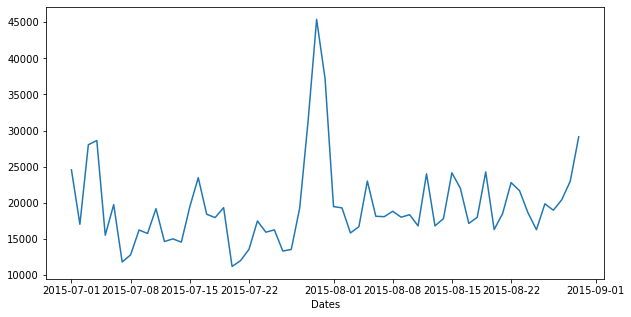

In [74]:
# 看日期的习惯
views_cnt_by_date.plot(kind='line', figsize=[10,5])

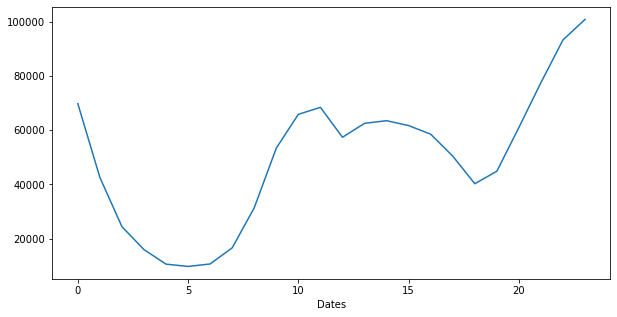

In [75]:
# 看每天的时间段习惯
views_cnt_by_hour = views.groupby(views['Dates'].dt.hour)['Action'].count()
views_cnt_by_hour.plot(kind='line', figsize=[10,5])

In [76]:
orders

,Dates,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0
...,...,...,...,...,...,...,...
54767,2015-07-30 23:58:53,order,U18517004,P0006036273,1,2899.0,2899.0
54768,2015-07-30 23:59:24,order,U217552746,P0010409991,1,253.0,253.0
54769,2015-07-30 23:59:33,order,U395036534,P0025123755,1,690.0,690.0
54770,2015-07-30 23:59:37,order,U14085643,P0009890670031,1,245.0,245.0


In [78]:
total_price_by_user = orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False)[:10]

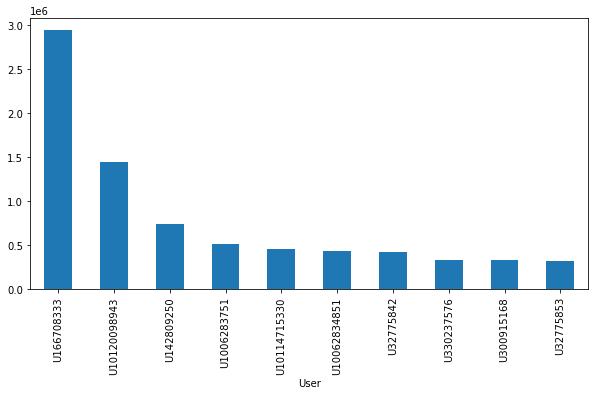

In [79]:
total_price_by_user.plot(kind='bar', figsize=[10, 5])

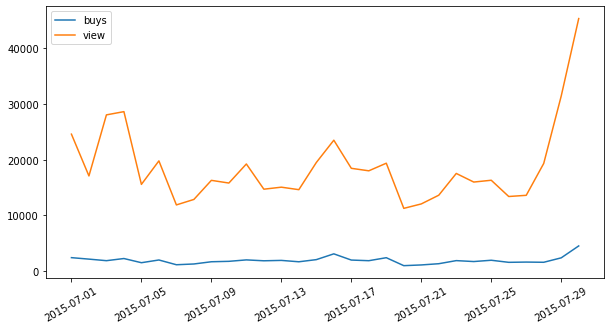

In [86]:
order_by_date = orders.groupby(orders['Dates'].dt.date)['Action'].count()
view_by_date = views.groupby(views['Dates'].dt.date)['Action'].count()
df = pd.concat([order_by_date, view_by_date], axis=1)
df.dropna(inplace=True)
df.columns=['buys', 'view']
df.plot(kind='line', figsize=[10, 5], rot=30)

In [84]:
order_by_date.index

Index([2015-07-01, 2015-07-02, 2015-07-03, 2015-07-04, 2015-07-05, 2015-07-06,
       2015-07-07, 2015-07-08, 2015-07-09, 2015-07-10, 2015-07-11, 2015-07-12,
       2015-07-13, 2015-07-14, 2015-07-15, 2015-07-16, 2015-07-17, 2015-07-18,
       2015-07-19, 2015-07-20, 2015-07-21, 2015-07-22, 2015-07-23, 2015-07-24,
       2015-07-25, 2015-07-26, 2015-07-27, 2015-07-28, 2015-07-29, 2015-07-30],
      dtype='object', name='Dates')